# Map Plotter
This is for producing plots and maps which rely on raw demographic data. Use `Plotting Prep.ipynb` to prepare a shapefile to be used as input here.

In [1]:
import geopandas as gpd
import pandas as pd
import shapely
import numpy as np
import matplotlib.pyplot as plt
import maup
from gerrychain import Graph



This takes in a plottable shapefile with relevant demographic data

In [2]:
state_gdf = gpd.read_file("Plottables/SD/SD.shp")
state_gdf.columns

Index(['STATEFP20_', 'COUNTYFP20', 'TRACTCE20_', 'BLOCKCE20_', 'GEOID20',
       'GEOIDFQ20', 'NAME20', 'MTFCC20', 'UR20', 'UACE20',
       ...
       'P1_068N', 'P1_069N', 'P1_070N', 'P1_071N', 'Unnamed_ 7', 'native_ame',
       'mixed_nati', 'perc_trump', 'NALAND', 'geometry'],
      dtype='object', length=125)

/home/gabed/Documents/Fall_24/Math195/Final_Project/.conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


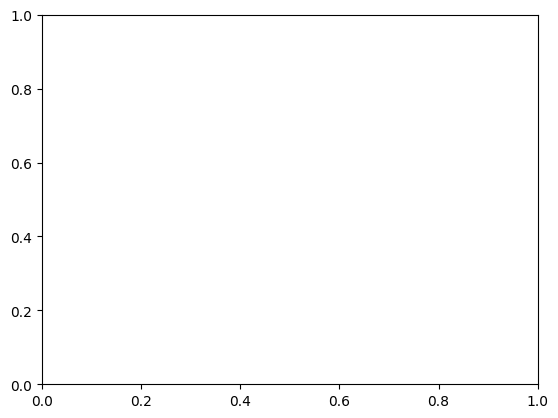

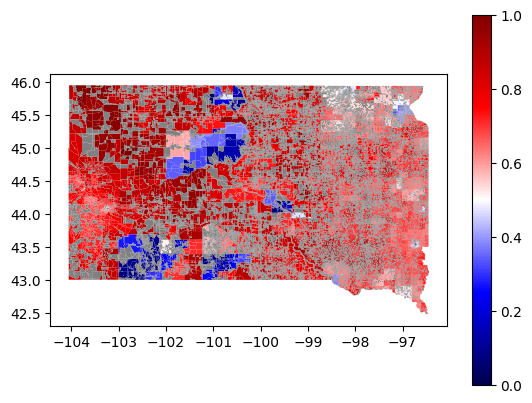

In [3]:
import matplotlib.colors as mcolors
norm = mcolors.Normalize(vmin=0, vmax=1)
fig, ax1 = plt.subplots()
state_gdf.plot(column = 'perc_trump', cmap = 'seismic', missing_kwds = {"color":"grey"}, legend = True, norm = norm,)
from pathlib import Path
Path("Plots/NM/Maps").mkdir(parents=True, exist_ok=True)

plt.savefig('Plots/SD/Maps/perc_trump') 

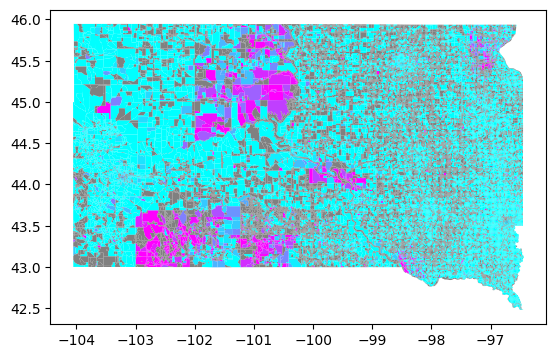

In [5]:
state_gdf.plot(column = 'native_ame', missing_kwds = {"color":"grey"},cmap='cool')
plt.savefig('Plots/SD/Maps/native-perc') 

KeyboardInterrupt: 

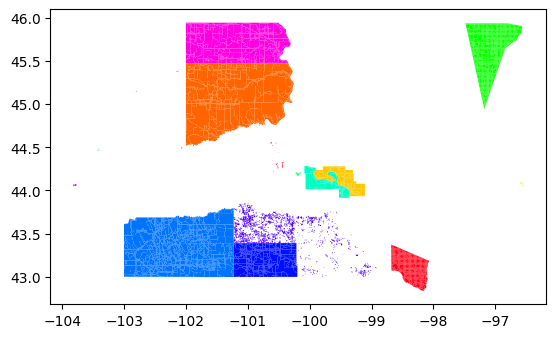

In [4]:
state_gdf.plot(column = 'NALAND', missing_kwds = {"color":"grey"}, cmap = 'hsv')
plt.savefig('Plots/SD/Maps/nativelands') 

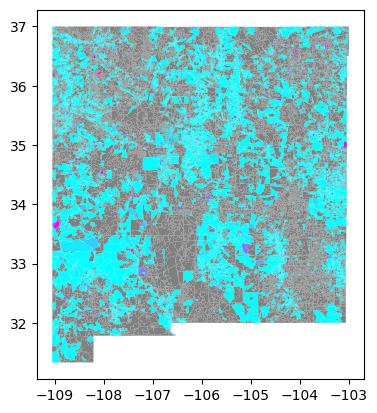

In [ ]:
state_gdf.plot(column = 'mixed_nati', missing_kwds = {"color":"grey"}, cmap='cool')
plt.savefig('Plots/SD/Maps/nativemixedperc') 

Restrict to just regions within Native areas.

In [ ]:
native_area_alone = state_gdf[state_gdf['IN_AIANHH'] == 'YES']

Sum votes for Biden & Trump on native lands

In [ ]:
land_grouped_by_trump_votes = native_area_alone.groupby('NALAND')['G20PRERTRU'].sum()

In [ ]:
land_grouped_by_biden_votes = native_area_alone.groupby('NALAND')['G20PREDBID'].sum()

Grab total population on Native lands

In [ ]:
land_grouped_by_pop = native_area_alone.groupby('NALAND')['P1_001N'].sum()
land_grouped_by_pop

NALAND
Acoma Off-Reservation Trust Land                             6
Acoma Pueblo                                              3224
Fort Sill Apache Indian Reservation                          0
Isleta Pueblo                                             3376
Jemez Pueblo                                              1991
Jicarilla Apache Nation Off-Reservation Trust Land           6
Jicarilla Apache Nation Reservation                       3488
Laguna Off-Reservation Trust Land                            0
Laguna Pueblo                                             3985
Mescalero Reservation                                     4022
Nambe Off-Reservation Trust Land                             0
Nambe Pueblo                                              1840
Navajo Nation Off-Reservation Trust Land                 24374
Navajo Nation Reservation                                40197
Ohkay Owingeh                                             6580
Picuris Pueblo                                  

Grab native pop in native lands

In [ ]:
land_grouped_by_native_pop = native_area_alone.groupby('NALAND')['P1_005N'].sum()
land_grouped_by_native_pop

NALAND
Acoma Off-Reservation Trust Land                             0
Acoma Pueblo                                              3043
Fort Sill Apache Indian Reservation                          0
Isleta Pueblo                                             2943
Jemez Pueblo                                              1959
Jicarilla Apache Nation Off-Reservation Trust Land           0
Jicarilla Apache Nation Reservation                       3086
Laguna Off-Reservation Trust Land                            0
Laguna Pueblo                                             3707
Mescalero Reservation                                     3721
Nambe Off-Reservation Trust Land                             0
Nambe Pueblo                                               575
Navajo Nation Off-Reservation Trust Land                 23455
Navajo Nation Reservation                                38736
Ohkay Owingeh                                             1730
Picuris Pueblo                                  

Get the percentage for Trump in Native lands

In [ ]:
land_grouped_by_perc_trump = land_grouped_by_trump_votes/(land_grouped_by_biden_votes+land_grouped_by_trump_votes)

Get Native perc in Native lands

In [ ]:
land_grouped_by_native_pop_perc = land_grouped_by_native_pop/land_grouped_by_pop

### Sorting values & Making Plots of Native Lands

In [ ]:
land_grouped_by_perc_trump.sort_values(ascending=False)

NALAND
Acoma Off-Reservation Trust Land                         0.493590
Jicarilla Apache Nation Off-Reservation Trust Land       0.454887
Santa Clara Pueblo                                       0.323244
Picuris Pueblo                                           0.319258
Sandia Pueblo                                            0.317597
Pojoaque Off-Reservation Trust Land                      0.315476
Navajo Nation Off-Reservation Trust Land                 0.311173
Ohkay Owingeh                                            0.278105
Navajo Nation Reservation                                0.277414
Pueblo of Pojoaque                                       0.276178
Nambe Pueblo                                             0.257195
Isleta Pueblo                                            0.247393
Mescalero Reservation                                    0.239279
Jicarilla Apache Nation Reservation                      0.224213
San Ildefonso Pueblo                                     0.221250
Tao

[Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '6'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '55'),
 Text(0, 0, '684'),
 Text(0, 0, '760'),
 Text(0, 0, '1173'),
 Text(0, 0, '1517'),
 Text(0, 0, '1623'),
 Text(0, 0, '1819'),
 Text(0, 0, '1840'),
 Text(0, 0, '1991'),
 Text(0, 0, '3160'),
 Text(0, 0, '3224'),
 Text(0, 0, '3376'),
 Text(0, 0, '3488'),
 Text(0, 0, '3529'),
 Text(0, 0, '3686'),
 Text(0, 0, '3985'),
 Text(0, 0, '4022'),
 Text(0, 0, '4649'),
 Text(0, 0, '4738'),
 Text(0, 0, '6580'),
 Text(0, 0, '7460'),
 Text(0, 0, '11322'),
 Text(0, 0, '24374'),
 Text(0, 0, '40197')]

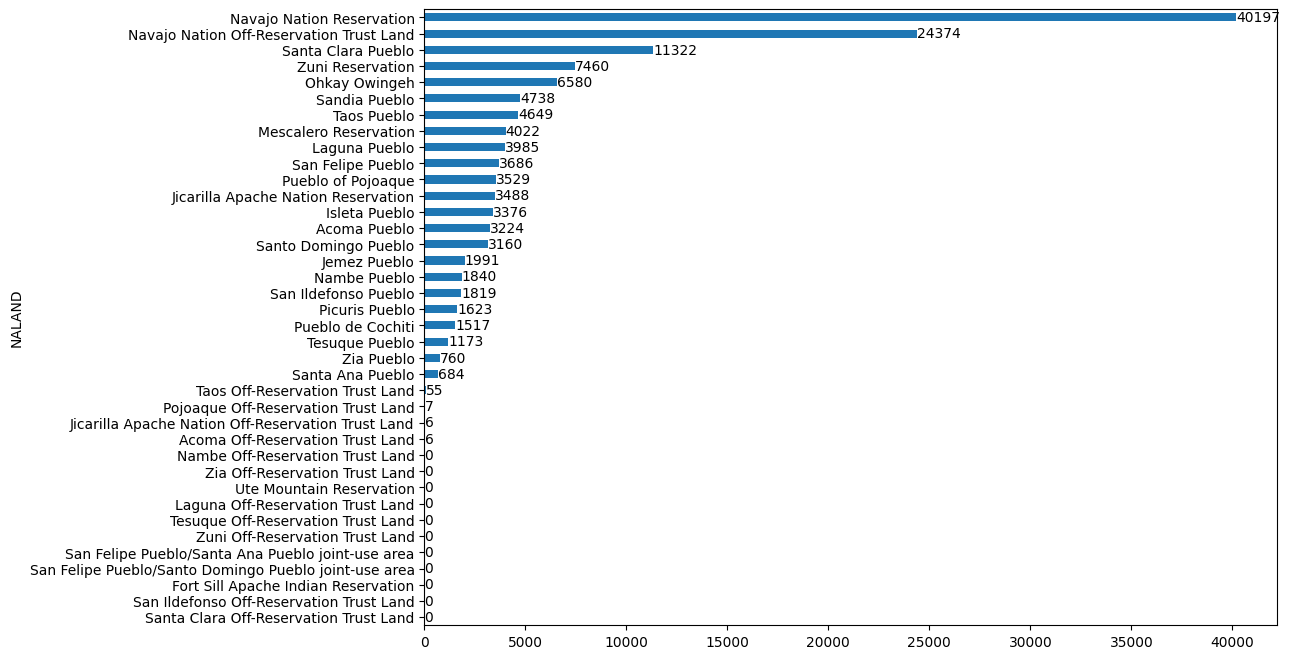

In [ ]:

ax = land_grouped_by_pop.sort_values(ascending=True).plot.barh(figsize = (11,8))
ax.bar_label(ax.containers[0])

<Axes: ylabel='NALAND'>

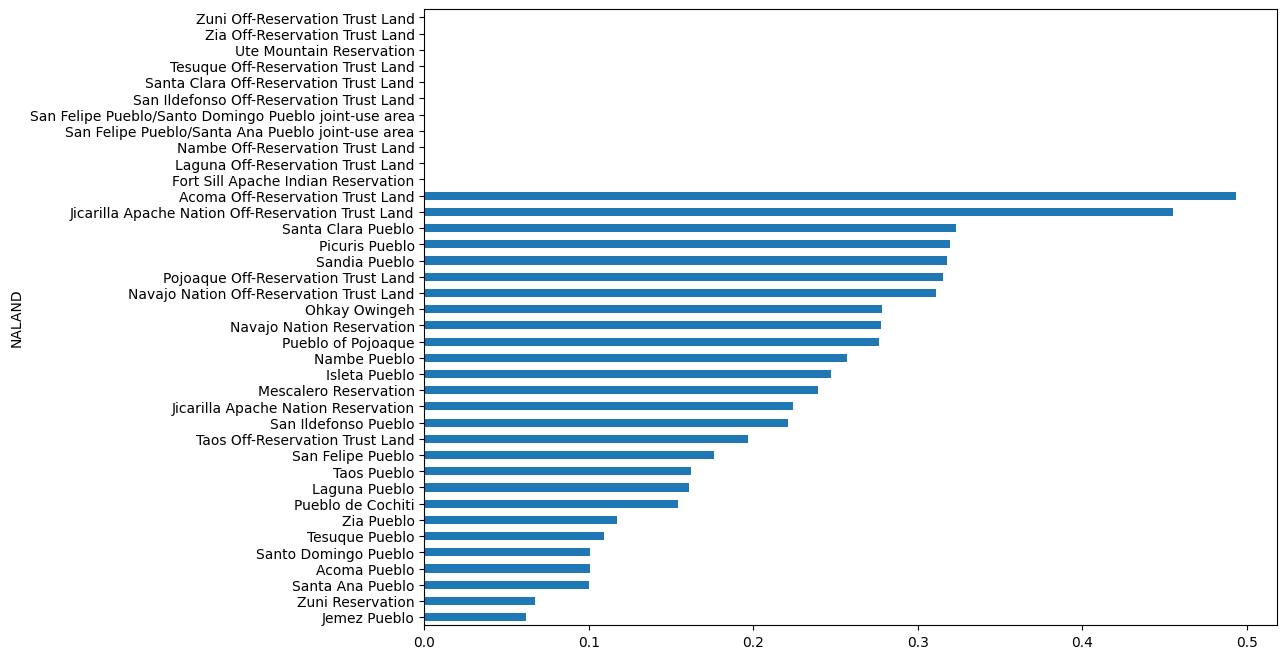

In [ ]:
land_grouped_by_perc_trump.sort_values(ascending= True).plot.barh(figsize = (11,8))

[Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0.0545455'),
 Text(0, 0, '0.133087'),
 Text(0, 0, '0.13646'),
 Text(0, 0, '0.142857'),
 Text(0, 0, '0.14352'),
 Text(0, 0, '0.149617'),
 Text(0, 0, '0.25855'),
 Text(0, 0, '0.262918'),
 Text(0, 0, '0.3125'),
 Text(0, 0, '0.342496'),
 Text(0, 0, '0.436488'),
 Text(0, 0, '0.475939'),
 Text(0, 0, '0.800868'),
 Text(0, 0, '0.871742'),
 Text(0, 0, '0.884748'),
 Text(0, 0, '0.887975'),
 Text(0, 0, '0.925162'),
 Text(0, 0, '0.930238'),
 Text(0, 0, '0.943859'),
 Text(0, 0, '0.956568'),
 Text(0, 0, '0.962296'),
 Text(0, 0, '0.963654'),
 Text(0, 0, '0.976608'),
 Text(0, 0, '0.983928'),
 Text(0, 0, '0.986842'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0')]

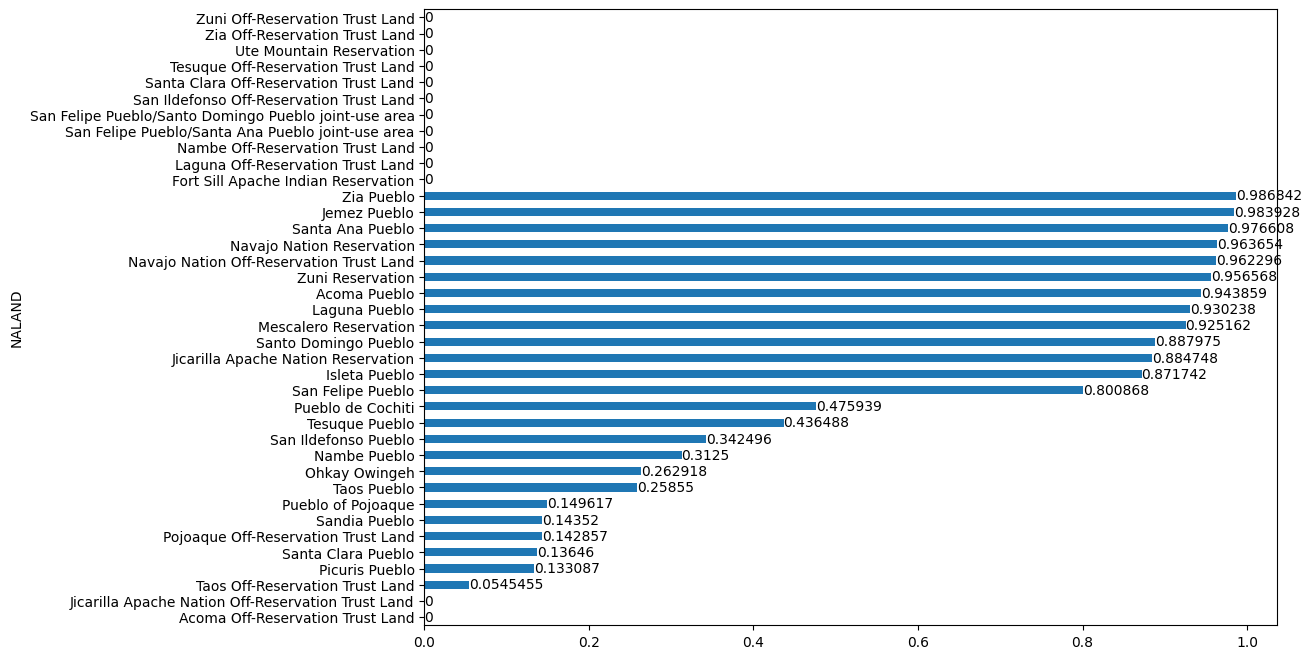

In [ ]:
ax = land_grouped_by_native_pop_perc.sort_values(ascending=True).plot.barh(figsize = (11,8))
ax.bar_label(ax.containers[0])
